In [57]:
import pandas as pd

In [58]:
import numpy as np

In [59]:
import seaborn as sns

In [60]:
import matplotlib.pyplot as plt

In [61]:
from sklearn.cluster import KMeans

In [62]:
soc = pd.read_csv('/content/social_network_ads_kmeans.csv')

In [63]:
soc.head()

,UserID,Gender,Age,EstimatedSalary
0,1,Male,19,19000
1,2,Female,35,20000
2,3,Female,26,43000
3,4,Female,27,57000
4,5,Male,19,76000


In [64]:
soc.shape

(20, 4)

In [65]:
soc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   UserID           20 non-null     int64 
 1   Gender           20 non-null     object
 2   Age              20 non-null     int64 
 3   EstimatedSalary  20 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 772.0+ bytes


In [66]:
soc.isnull().sum()

,0
UserID,0
Gender,0
Age,0
EstimatedSalary,0


In [67]:
x = soc.iloc[:,[2,3]].values

In [68]:
print(x)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]]


In [69]:
WCSS = []
for i in range(1,11) :
  kmeans=KMeans(n_clusters = i,init = 'k-means++',random_state = 42)
  kmeans.fit(x)
  WCSS.append(kmeans.inertia_)

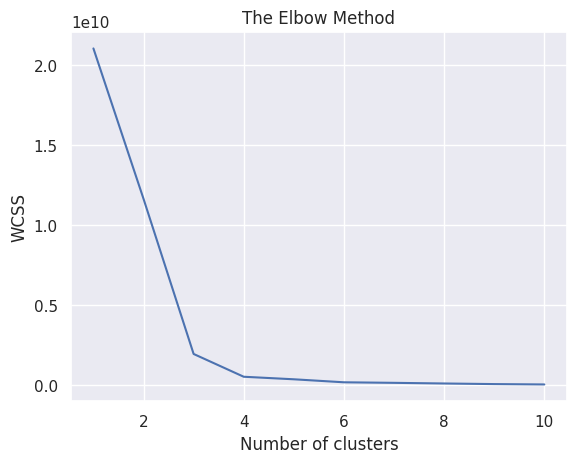

In [70]:
sns.set()
plt.plot(range(1,11),WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [71]:
Kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y=Kmeans.fit_predict(x)
print(y)

[4 4 3 3 2 3 2 0 1 3 2 3 2 4 2 2 1 1 1 1]


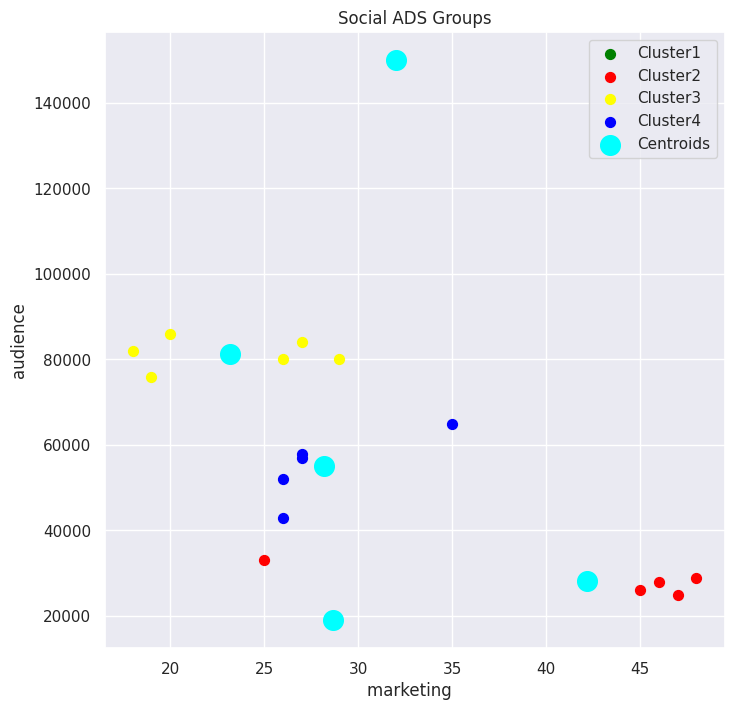

In [72]:
plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0],x[y==0,1],s=50,c='green',label='Cluster1')
plt.scatter(x[y==1,0],x[y==1,1],s=50,c='red',label='Cluster2')
plt.scatter(x[y==2,0],x[y==2,1],s=50,c='yellow',label='Cluster3')
plt.scatter(x[y==3,0],x[y==3,1],s=50,c='blue',label='Cluster4')

plt.scatter(Kmeans.cluster_centers_[:,0],Kmeans.cluster_centers_[:,1],s=200,c='cyan',label='Centroids')

plt.title('Social ADS Groups')
plt.xlabel('marketing  ')
plt.ylabel('audience')
plt.legend()
plt.show()